# Scalar Gaussian Beam Example

In this example, we simulate results from [1].

[1] Zhang, Yanfeng, et al. "Influence of absorption on optical trapping force of spherical particles in a focused Gaussian beam." <i>Journal of Optics A: Pure and Applied Optics</i> 10.8 (2008): 085001.

In [42]:
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../../opticalforces')

from beam import ScalarGaussianBeam, Point
from particle import SphericalParticle    

In [43]:
# Gaussian beam and spherical particle used by Zhang et al
sgb = ScalarGaussianBeam()
sgb.vacuum_wavelength = 0.488e-6
sgb.medium_refractive_index = 1.33
sgb.gaussian_spot = 0.4e-6
print(sgb)

ptc = SphericalParticle()
ptc.medium_refractive_index = sgb.medium_refractive_index
ptc.radius = 6e-6
ptc.refractive_index = 1.6

paramx = {'param': 'beam_pos_x',
          'start': -3*ptc.radius,
          'stop': 3*ptc.radius,
          'num': 100,}

name: scalar-gaussian-beam
    _amplitude: 1
    _phase: 0
    _vacuum_wavelength: 4.88e-07
    _vacuum_wavenumber: 12875379.72782702
    _medium_refractive_index: 1.33
    _wavelength: 3.669172932330827e-07
    _wavenumber: 17124255.038009938
    _q: 6250000000000.001
    _gaussian_spot: 4e-07
    _rayleigh_range: 1.369940403040795e-06



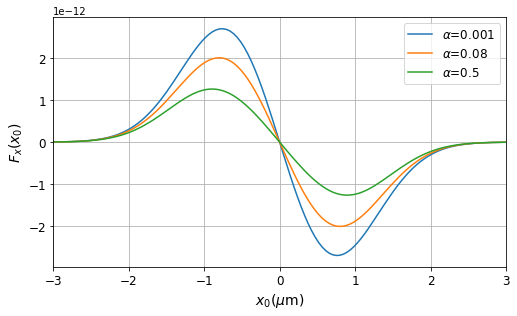

In [44]:
# Force graphic when beam is at (0, 0, 4*Rp), figure 4.a) from [1].
beam_pos = Point(0, 0, 4*ptc.radius)

plt.figure(1, figsize=(4.5*1.618, 4.5))

for alpha in (0.001e6, 0.08e6, 0.5e6):
    ptc.absorption_coefficient = alpha
    X, F = ptc.geo_opt_force(sgb, beam_pos, force_dir='fx', paramx=paramx)
    label = r'$\alpha$=%s' % (str(ptc.absorption_coefficient*1e-6))
    plt.plot([-x/ptc.radius for x in X], F, '-', label=label)

ax = plt.gca()
ax.set_xlim([-3, 3])
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'$x_0(\mu$m)', fontsize=14)
plt.ylabel(r'$F_x(x_0$)', fontsize=14)
plt.legend(fontsize=12, loc=1)
plt.grid()
plt.tight_layout()
plt.savefig('fig4a.png')
plt.show()

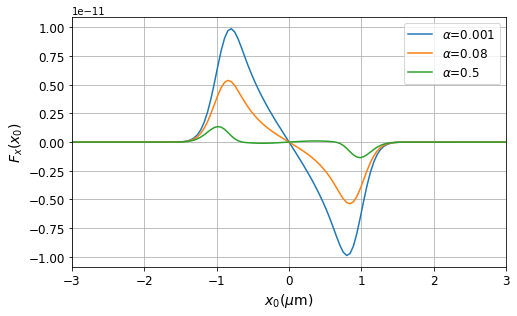

In [45]:
# Force graphic when beam is at (0, 0, 1*Rp), figure 4.b) from [1].
beam_pos = Point(0, 0, 1*ptc.radius)

plt.figure(2, figsize=(4.5*1.618, 4.5))

for alpha in (0.001e6, 0.08e6, 0.5e6):
    ptc.absorption_coefficient = alpha
    X, F = ptc.geo_opt_force(sgb, beam_pos, force_dir='fx', paramx=paramx)
    label = r'$\alpha$=%s' % (str(ptc.absorption_coefficient*1e-6))
    plt.plot([-x/ptc.radius for x in X], F, '-', label=label)

ax = plt.gca()
ax.set_xlim([-3, 3])
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'$x_0(\mu$m)', fontsize=14)
plt.ylabel(r'$F_x(x_0$)', fontsize=14)
plt.legend(fontsize=12, loc=1)
plt.grid()
plt.tight_layout()
plt.savefig('fig4b.png')
plt.show()

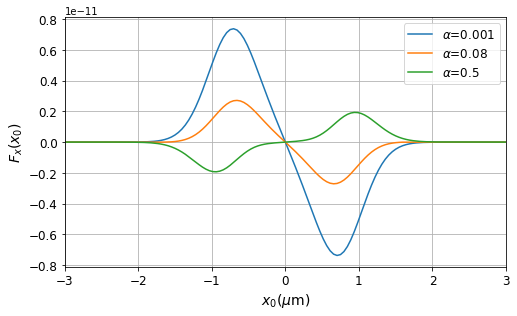

In [46]:
# Force graphic when beam is at (0, 0, -2*Rp), figure 4.c) from [1].
beam_pos = Point(0, 0, -2*ptc.radius)

plt.figure(3, figsize=(4.5*1.618, 4.5))

for alpha in (0.001e6, 0.08e6, 0.5e6):
    ptc.absorption_coefficient = alpha
    X, F = ptc.geo_opt_force(sgb, beam_pos, force_dir='fx', paramx=paramx)
    label = r'$\alpha$=%s' % (str(ptc.absorption_coefficient*1e-6))
    plt.plot([-x/ptc.radius for x in X], F, '-', label=label)

ax = plt.gca()
ax.set_xlim([-3, 3])
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'$x_0(\mu$m)', fontsize=14)
plt.ylabel(r'$F_x(x_0$)', fontsize=14)
plt.legend(fontsize=12, loc=1)
plt.grid()
plt.tight_layout()
plt.savefig('fig4c.png')
plt.show()

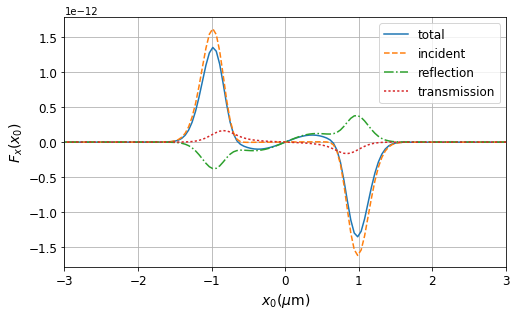

In [47]:
# All force's componetes, figure 8) from [1].
beam_pos = Point(0, 0, 1*ptc.radius)
ptc.absorption_coefficient = 0.5e6

plt.figure(4, figsize=(4.5*1.618, 4.5))

X, F = ptc.geo_opt_force(sgb, beam_pos, force_dir='fx', force_type='total', paramx=paramx)
plt.plot([-x/ptc.radius for x in X], F, '-', label='total')

X, F = ptc.geo_opt_force(sgb, beam_pos, force_dir='fx', force_type='incident', paramx=paramx)
plt.plot([-x/ptc.radius for x in X], F, '--', label='incident')

X, F = ptc.geo_opt_force(sgb, beam_pos, force_dir='fx', force_type='reflection', paramx=paramx)
plt.plot([-x/ptc.radius for x in X], F, '-.', label='reflection')

X, F = ptc.geo_opt_force(sgb, beam_pos, force_dir='fx', force_type='transmission', paramx=paramx)
plt.plot([-x/ptc.radius for x in X], F, ':', label='transmission')

ax = plt.gca()
ax.set_xlim([-3, 3])
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'$x_0(\mu$m)', fontsize=14)
plt.ylabel(r'$F_x(x_0$)', fontsize=14)
plt.legend(fontsize=12, loc=1)
plt.grid()
plt.tight_layout()
plt.savefig('fig8.png')
plt.show()